# Data Science Pipeline

## EDA

In [10]:
%matplotlib inline
import pandas as pd # TO BE ADDED
iris_filename = './datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, header=None, names= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f84d801c710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f84d802b610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f84d8036910>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f84d80362d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f84d801c8d0>,
  <matplotlib.lines.Line2D at 0x7f84d800b450>]}

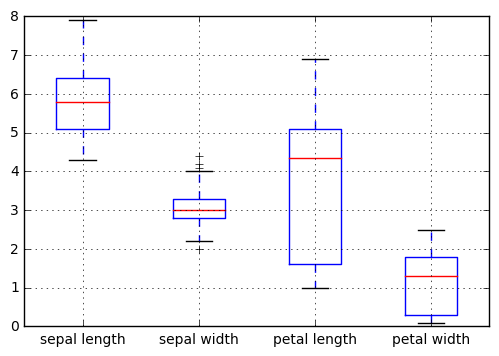

In [12]:
iris.boxplot()

In [13]:
iris.quantile([0.1, 0.9])

,sepal length,sepal width,petal length,petal width
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


In [14]:
iris.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
pd.crosstab(iris['petal length'] > 3.758667, iris['petal width'] > 1.198667)

petal width,False,True
petal length,,
False,56,1
True,4,89


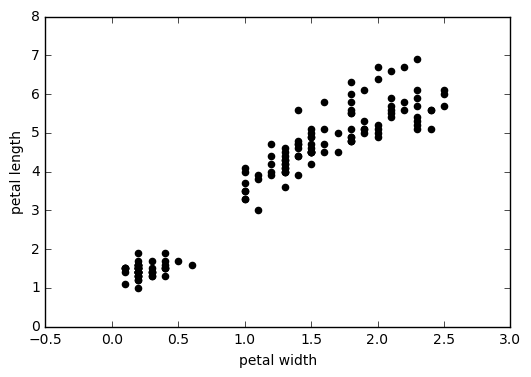

In [16]:
import matplotlib.pyplot as plt

plt.scatter(iris['petal width'], iris['petal length'], alpha=1.0, color='k')
plt.xlabel("petal width")
plt.ylabel("petal length")

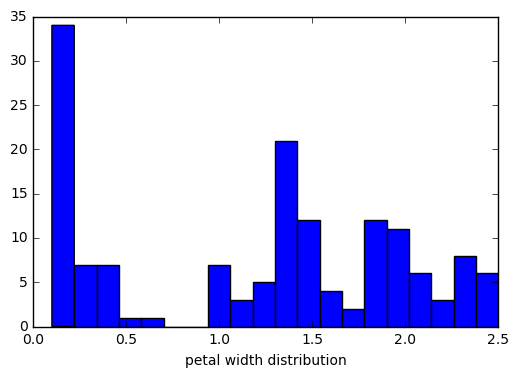

In [17]:
plt.hist(iris['petal width'], bins=20)
plt.xlabel("petal width distribution")

## Feature Creation

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
cali = datasets.california_housing.fetch_california_housing()
X = cali['data']
Y = cali['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

downloading Cal. housing from http://lib.stat.cmu.edu/modules.php?op=modload&name=Downloads&file=index&req=getit&lid=83 to /home/moonbury/scikit_learn_data


BadZipfile: File is not a zip file

In [19]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, Y_train)
Y_est = regressor.predict(X_test)
print "MAE=", mean_squared_error(Y_test, Y_est)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, Y_train)
Y_est = regressor.predict(X_test_scaled)
print "MAE=", mean_squared_error(Y_test, Y_est)

In [ ]:
non_linear_feat = 5 # AveOccup 
X_train_new_feat = np.sqrt(X_train[:,non_linear_feat])
X_train_new_feat.shape = (X_train_new_feat.shape[0], 1)
X_train_extended = np.hstack([X_train, X_train_new_feat])
X_test_new_feat = np.sqrt(X_test[:,non_linear_feat])
X_test_new_feat.shape = (X_test_new_feat.shape[0], 1)
X_test_extended = np.hstack([X_test, X_test_new_feat])
scaler = StandardScaler()
X_train_extended_scaled = scaler.fit_transform(X_train_extended)
X_test_extended_scaled = scaler.transform(X_test_extended)
regressor = KNeighborsRegressor()
regressor.fit(X_train_extended_scaled, Y_train)
Y_est = regressor.predict(X_test_extended_scaled)
print "MAE=", mean_squared_error(Y_test, Y_est)

## Dimensionality Reduction

### Covariance matrix

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
cov_data = np.corrcoef(iris.data.T)
print iris.feature_names
print cov_data

In [ ]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.winter)
plt.colorbar(img, ticks=[-1, 0, 1])

In [ ]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(iris.data)
X_pca_2c.shape

In [ ]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none')
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [ ]:
pca_2c.components_

In [ ]:
pca_2cw = PCA(n_components=2, whiten=True)
X_pca_1cw = pca_2cw.fit_transform(iris.data)
plt.scatter(X_pca_1cw[:,0], X_pca_1cw[:,1], c=iris.target, alpha=0.8, edgecolors='none'); plt.show()
pca_2cw.explained_variance_ratio_.sum()

In [ ]:
pca_1c = PCA(n_components=1)
X_pca_1c = pca_1c.fit_transform(iris.data)
plt.scatter(X_pca_1c[:,0], np.zeros(X_pca_1c.shape), c=iris.target, alpha=0.8, edgecolors='none'); plt.show()
pca_1c.explained_variance_ratio_.sum()

In [ ]:
pca_95pc = PCA(n_components=0.95)
X_pca_95pc = pca_95pc.fit_transform(iris.data)
print pca_95pc.explained_variance_ratio_.sum()
print X_pca_95pc.shape

### A variation of PCA for big data: randomized PCA

In [ ]:
from sklearn.decomposition import RandomizedPCA
rpca_2c = RandomizedPCA(n_components=2)
X_rpca_2c = rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none'); plt.show()
rpca_2c.explained_variance_ratio_.sum()

### Latent Factor Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis
fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0], X_factor[:,1], c=iris.target, alpha=0.8, edgecolors='none'); plt.show()

### Linear Discriminant Analysis, LDA

In [ ]:
from sklearn.lda import LDA
lda_2c = LDA(n_components=2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)
plt.scatter(X_lda_2c[:,0], X_lda_2c[:,1], c=iris.target, alpha=0.8, edgecolors='none'); plt.show()

### Latent Semantical Analysis, LSA

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(twenty_sci_news.data)
from sklearn.decomposition import TruncatedSVD
tsvd_2c = TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)
np.array(tf_vect.get_feature_names())[tsvd_2c.components_[20].argsort()[-10:][::-1]]

### Kernel PCA

In [ ]:
def circular_points (radius, N):
           return np.array([[np.cos(2*np.pi*t/N)*radius, np.sin(2*np.pi*t/N)*radius] for t in xrange(N)])
N_points = 50
fake_circular_data = np.vstack([circular_points(1.0, N_points), circular_points(5.0, N_points)])
fake_circular_data += np.random.rand(*fake_circular_data.shape)
fake_circular_target = np.array([0]*N_points + [1]*N_points)
plt.scatter(fake_circular_data[:,0], fake_circular_data[:,1], c=fake_circular_target, alpha=0.8, edgecolors='none'); plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA
kpca_2c = KernelPCA(n_components=2, kernel='rbf')
X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)
plt.scatter(X_kpca_2c[:,0], X_kpca_2c[:,1], c=fake_circular_target, alpha=0.8, edgecolors='none'); plt.show()

### Restricted Boltzmann Machine, RBM

In [ ]:
from sklearn import preprocessing
from sklearn.neural_network import BernoulliRBM
n_components = 64 # Try with 64, 100, 144
olivetti_faces = datasets.fetch_olivetti_faces()
X = preprocessing.binarize(preprocessing.scale(olivetti_faces.data), 0.5)
rbm = BernoulliRBM(n_components=n_components, learning_rate=0.01, n_iter=100)
rbm.fit(X)
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(int(np.sqrt(n_components+1)), int(np.sqrt(n_components+1)), i + 1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(()); plt.yticks(())
    
plt.suptitle(str(n_components) + ' components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

## Detection and Treatment of Outliers

### Univariate outlier detection

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
continuous_variables = [n for n in range(shape(boston.data)[1]) if n!=3]

In [ ]:
import numpy as np
from sklearn import preprocessing
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
outliers_rows, outliers_columns = np.where(np.abs(normalized_data)>3)

In [ ]:
print outliers_rows

In [ ]:
print zip(outliers_rows, outliers_columns)

### EllipticEnvelope

In [ ]:
# Create an artificial distribution made of blobs
from sklearn.datasets import make_blobs
blobs = 1
blob = make_blobs(n_samples=100, n_features=2, centers=blobs, cluster_std=1.5, shuffle=True, random_state=5)
# Robust Covariance Estimate
from sklearn.covariance import EllipticEnvelope
robust_covariance_est = EllipticEnvelope(contamination=.1).fit(blob[0])
detection = robust_covariance_est.predict(blob[0])
outliers = np.where(detection==-1)
inliers = np.where(detection==1)
# Draw the distribution and the detected outliers
from matplotlib import pyplot as plt
# Just the distribution
plt.plot(blob[0][:,0],blob[0][:,1], 'x', markersize=10, color='blue', alpha=0.8)
plt.show()
# The distribution and the outliers
a = plt.plot(blob[0][inliers,0],blob[0][inliers,1], 'x', markersize=10, color='blue', alpha=0.8, label='inliers')
b = plt.plot(blob[0][outliers,0],blob[0][outliers,1], 'o', markersize=6,color='red', alpha=0.8, label='outliers')
plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='lower right')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
# Normalized data relative to continuos variables
continuous_variables = [n for n in range(shape(boston.data)[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
# Just for visualization purposes pick the first 2 PCA components
pca = PCA(n_components=2)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))
v1 = str(round(pca.explained_variance_ratio_[0],3))
v2 = str(round(pca.explained_variance_ratio_[1],3))

In [ ]:
# Robust Covariance Estimate
robust_covariance_est = EllipticEnvelope(store_precision=False, assume_centered = False, contamination=.05)
robust_covariance_est.fit(normalized_data)
detection = robust_covariance_est.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

In [ ]:
# Draw the distribution and the detected outliers
from matplotlib import pyplot as plt
a = plt.plot(Zscore_components[regular,0],Zscore_components[regular,1], 'x', markersize=2, color='blue', alpha=0.6, label='inliers')
b = plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,1], 'o', markersize=6,color='red', alpha=0.8, label='outliers')
plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')
plt.xlim([-7,7])
plt.ylim([-6,6])
plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='best')
plt.title(vtot)
plt.show()

### OneClassSVM

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import svm
# Normalized data relative to continuos variables
continuous_variables = [n for n in range(shape(boston.data)[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
# Just for visualization purposes pick the first 5 PCA components
pca = PCA(n_components=5)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))
# OneClassSVM fitting and estimates
outliers_fraction = 0.02 # 
nu_estimate = 0.95 * outliers_fraction + 0.05
machine_learning = svm.OneClassSVM(kernel="rbf", gamma=1.0/len(normalized_data), degree=3, nu=nu_estimate)
machine_learning.fit(normalized_data)
detection = machine_learning.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

In [ ]:
# Draw the distribution and the detected outliers
from matplotlib import pyplot as plt
for r in range(1,5):
  a = plt.plot(Zscore_components[regular,0],Zscore_components[regular,r], 'x', markersize=2, color='blue', alpha=0.6, label='inliers')
  b = plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,r], 'o', markersize=6,color='red', alpha=0.8, label='outliers')
  plt.xlabel('Component 1 ('+str(round(pca.explained_variance_ratio_[0],3))+')')
  plt.ylabel('Component '+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r],3))+')')
  plt.xlim([-7,7])
  plt.ylim([-6,6])
  plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='best')
  plt.title(vtot)
  plt.show()

## Scoring functions

### Multilabel classification

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
# No crossvalidation for this dummy notebook
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.50, random_state=4)
# Use a very bad multiclass classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test)
iris.target_names

In [ ]:
from sklearn import metrics # TO BE CORRECTED
cm = metrics.confusion_matrix(Y_test, Y_pred) # TO BE CORRECTED

In [ ]:
print cm

In [ ]:
print "Accuracy:", metrics.accuracy_score(Y_test, Y_pred)

In [ ]:
print "Precision:", metrics.precision_score(Y_test, Y_pred)

In [ ]:
print "Recall:", metrics.recall_score(Y_test, Y_pred)

In [ ]:
print "F1 score:", metrics.f1_score(Y_test, Y_pred)

In [ ]:
from sklearn.metrics import classification_report
print classification_report(Y_test, Y_pred, target_names=iris.target_names)

### Regression

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error([1.0, 0.0, 0.0], [0.0, 0.0, -1.0])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error([-10.0, 0.0, 0.0], [0.0, 0.0, 0.0])

## Testing and Validating

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print digits.DESCR
X = digits.data
y = digits.target

In [ ]:
X[0]

In [ ]:
from sklearn import svm
h1 = svm.LinearSVC(C=1.0) # linear SVC
h2 = svm.SVC(kernel='rbf', degree=3, gamma=0.001, C=1.0) # Radial basis SVC
h3 = svm.SVC(kernel='poly', degree=3, C=1.0) # 3rd degree polynomial SVC

In [ ]:
h1.fit(X,y)
print h1.score(X,y)

In [ ]:
from sklearn import cross_validation #ATTENTION, FORGOTTEN IN THE DRAFT, TO BE ADDED

In [ ]:
chosen_random_state = 1
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30, random_state=chosen_random_state)
print "X train shape %s, X test shape %s, \ny train shape %s, y test shape %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
h1.fit(X_train,y_train)
print h1.score(X_test,y_test) # Returns the mean accuracy on the given test data and labels

In [ ]:
chosen_random_state = 1
X_train, X_validation_test, y_train, y_validation_test = cross_validation.train_test_split(X, y, test_size=.40,
                                                                                           random_state=chosen_random_state)
X_validation, X_test, y_validation, y_test = cross_validation.train_test_split(X_validation_test, y_validation_test, 
                                                                                           test_size=.50, random_state=chosen_random_state)
print "X train shape, %s, X validation shape %s, X test shape %s, \ny train shape %s, y validation shape %s, y test shape %s\n" % (X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape)
for hypothesis in [h1, h2, h3]:
    hypothesis.fit(X_train,y_train)
    print "%s -> validation mean accuracy = %0.3f" % (hypothesis, hypothesis.score(X_validation,y_validation))    
h2.fit(X_train,y_train)
print "\n%s -> test mean accuracy = %0.3f" % (h2, h2.score(X_test,y_test))

### Cross Validation

In [ ]:
choosen_random_state = 1
cv_folds = 10 # Try 3, 5 or 20
eval_scoring='accuracy' # Try also f1
workers = -1 # this will use all your CPU power
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30, random_state=choosen_random_state)
for hypothesis in [h1, h2, h3]:
    scores = cross_validation.cross_val_score(hypothesis, X_train, y_train, cv=cv_folds, scoring= eval_scoring, n_jobs=workers)
    print "%s -> cross validation accuracy: mean = %0.3f std = %0.3f" % (hypothesis, np.mean(scores), np.std(scores))

In [ ]:
scores

### Using cross-validation iterators

In [ ]:
kfolding = cross_validation.KFold(n=100, n_folds=10, shuffle=True, random_state=1)
for train_idx, validation_idx in kfolding:
    print train_idx, validation_idx

In [ ]:
h1.fit(X[train_idx],y[train_idx])
h1.score(X[validation_idx],y[validation_idx])

### Sampling and Bootstrapping

In [ ]:
subsampling = cross_validation.ShuffleSplit(n=100, n_iter=10, test_size=0.1, random_state=1)
for train_idx, validation_idx in subsampling:
    print train_idx, validation_idx

In [ ]:
import random
def Bootstrap(n, n_iter=3, random_state=None):
    """
    Random sampling with replacement cross-validation generator.
    For each iter a sample bootstrap of the indexes [0, n) is 
    generated and the function returns the obtained sample 
    and a list of all theexcluded indexes.
    """
    if random_state:
        random.seed(random_state)
    for j in range(n_iter):
        bs = [random.randint(0, n-1) for i in range(n)]
        out_bs = list({i for i in range(n)} - set(bs))
        yield bs, out_bs

boot = Bootstrap(n=100, n_iter=10, random_state=1)
for train_idx, validation_idx in boot:
    print train_idx, validation_idx

## Hyper-parameters Optimization

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
from sklearn import svm
h = svm.SVC()
hp = svm.SVC(probability=True, random_state=1)

In [ ]:
from sklearn import grid_search
search_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
scorer = 'accuracy'

In [ ]:
search_func = grid_search.GridSearchCV(estimator=h, param_grid=search_grid, scoring=scorer, n_jobs=-1, iid=False, refit=True, cv=10)
%timeit search_func.fit(X,y)
print search_func.best_estimator_
print search_func.best_params_
print search_func.best_score_

### Building custom scoring functions

In [ ]:
from sklearn.metrics import log_loss, make_scorer
Log_Loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True) 

In [ ]:
search_func = grid_search.GridSearchCV(estimator=hp, param_grid=search_grid, scoring=Log_Loss, n_jobs=-1, iid=False, refit=True, cv=3)
search_func.fit(X,y)
print search_func.best_score_
print search_func.best_params_

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def my_custom_log_loss_func(ground_truth, p_predictions, penalty = list(), eps=1e-15):
    adj_p = np.clip(p_predictions, eps, 1 - eps)
    lb = LabelBinarizer()
    g = lb.fit_transform(ground_truth)
    if g.shape[1] == 1:
        g = np.append(1 - g, g, axis=1)
    if penalty:
        g[:,penalty] = g[:,penalty] * 2
    summation = np.sum(g * np.log(adj_p))
    return summation * (-1.0/len(ground_truth))

In [ ]:
my_custom_scorer = make_scorer(my_custom_log_loss_func, greater_is_better=False, needs_proba=True, penalty = [4,9])

In [ ]:
from sklearn import grid_search

search_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]search_func = grid_search.GridSearchCV(estimator=hp, param_grid=search_grid, scoring=my_custom_scorer, n_jobs=1, iid=False, refit=True, cv=3)

search_func.fit(X,y)
print search_func.best_score_
print search_func.best_params_

### Reducing grid search run time

In [ ]:
search_dict = {'kernel': ['linear','rbf'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
scorer = 'accuracy'
search_func = grid_search.RandomizedSearchCV(estimator=h, param_distributions=search_dict, n_iter=7, scoring=scorer, 
                                          n_jobs=-1, iid=False, refit=True, cv=10)
%timeit search_func.fit(X,y)
print search_func.best_estimator_
print search_func.best_params_
print search_func.best_score_

In [ ]:
search_func.grid_scores_

## Feature Selection

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=800, n_features=100, n_informative=25, n_redundant=0, random_state=101)

### Univariate selection

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import Binarizer, scale
Xbin = Binarizer().fit_transform(scale(X))
# if you use chi2, input X must be non-negative: X must contain booleans or frequencies
# hence the choice to binarize after the normalization if the variable if above the average
Selector_chi2 = SelectPercentile(chi2, percentile=25).fit(Xbin, y)
Selector_f_classif = SelectPercentile(f_classif, percentile=25).fit(X, y)
chi_scores = Selector_chi2.get_support()
f_classif_scores = Selector_f_classif.get_support()
selected = chi_scores & f_classif_scores # use the bitwise and operator

### Recursive elimination

In [ ]:
from sklearn.cross_validation import train_test_split
X, y = make_classification(n_samples=100, n_features=100, n_informative=5, n_redundant=2, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=101)
classifier.fit(X_train, y_train)
print 'In-sample accuracy: %0.3f' % classifier.score(X_train, y_train)
print 'Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test)

In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=classifier, step=1, cv=10, scoring='accuracy')
selector.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)

In [ ]:
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)
print 'Out-of-sample accuracy: %0.3f' % classifier.score(X_test_s, y_test)

### Stability and L1 based selection

In [ ]:
from sklearn.svm import LinearSVC
classifier = LogisticRegression(C=0.1, penalty='l1', random_state=101) # the smaller C the fewer features selected
classifier.fit(X_train, y_train)
print 'Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import RandomizedLogisticRegression
selector = RandomizedLogisticRegression(n_resampling=300, random_state=101)
selector.fit(X_train, y_train)
print 'Variables selected: %i' % sum(selector.get_support()!=0)
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)
print 'Out-of-sample accuracy: %0.3f' % classifier.score(X_test_s, y_test)